In 2 dimentional image Segmentation we use 2d convolution network here in this project we are trying to use a 3d CNN model for classification.For classifying 3d datasets pointnets are better alternative but it requires creating complex architecture.MNIST dataset consists of digits from 0-9.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


First we are downloading the dataset from kaggle.

In [4]:
!kaggle datasets download -d daavoo/3d-mnist

 90% 138M/153M [00:00<00:00, 168MB/s]
100% 153M/153M [00:00<00:00, 184MB/s]


In [5]:
!unzip \*.zip  && rm *.zip

Archive:  3d-mnist.zip
replace full_dataset_vectors.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: full_dataset_vectors.h5  
  inflating: plot3D.py               
  inflating: test_point_clouds.h5    
  inflating: train_point_clouds.h5   
  inflating: voxelgrid.py            


In [6]:
import numpy as np
import h5py

Then we are seperating training and testing data from the dataset.

In [7]:
with h5py.File('full_dataset_vectors.h5', 'r') as dataset:
    x_train = dataset["X_train"][:]
    x_test = dataset["X_test"][:]
    y_train = dataset["y_train"][:]
    y_test = dataset["y_test"][:]

In [8]:
print ("x_train shape: ", x_train.shape)
print ("y_train shape: ", y_train.shape)

print ("x_test shape:  ", x_test.shape)
print ("y_test shape:  ", y_test.shape)

x_train shape:  (10000, 4096)
y_train shape:  (10000,)
x_test shape:   (2000, 4096)
y_test shape:   (2000,)


We add 3 color channels to data data similar to as we do 3 channels to image set

In [9]:
xtrain = np.ndarray((x_train.shape[0], 4096, 3))
xtest = np.ndarray((x_test.shape[0], 4096, 3))

In [10]:
from matplotlib.pyplot import cm

In [11]:
def add_rgb_dimention(array):
    scalar_map = cm.ScalarMappable(cmap="Oranges")
    return scalar_map.to_rgba(array)[:, : -1]

for i in range(x_train.shape[0]):
    xtrain[i] = add_rgb_dimention(x_train[i])
for i in range(x_test.shape[0]):
    xtest[i] = add_rgb_dimention(x_test[i])

In [12]:
xtrain = xtrain.reshape(x_train.shape[0], 16, 16, 16, 3)
xtest = xtest.reshape(x_test.shape[0], 16, 16, 16, 3)

In [13]:
xtrain.shape

(10000, 16, 16, 16, 3)

Now set the lables to one-hot matrix for classification.

In [14]:
import keras.utils

In [15]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [16]:
y_train.shape

(10000, 10)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPool3D, Flatten, Dense
from tensorflow.keras.layers import Dropout,BatchNormalization
model=Sequential()
model.add(Conv3D(32,(3,3,3),activation='relu',padding='same',input_shape=xtrain.shape[1:]))
model.add(MaxPool3D((2,2,2)))
model.add(Conv3D(64,(3,3,3),activation='relu',padding='same'))
model.add(MaxPool3D((2,2,2)))
model.add(Conv3D(128,(3,3,3),activation='relu',padding='same'))
model.add(MaxPool3D((2,2,2)))
model.add(Conv3D(256,(3,3,3),activation='relu',padding='same'))
model.add(MaxPool3D((2,2,2)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 16, 16, 16, 32)    2624      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 8, 8, 8, 32)       0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 8, 8, 8, 64)       55360     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 4, 4, 4, 64)       0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 4, 4, 4, 128)      221312    
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 2, 2, 2, 128)      0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 2, 2, 2, 256)      8

In [18]:
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax")) 

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 16, 16, 16, 32)    2624      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 8, 8, 8, 32)       0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 8, 8, 8, 64)       55360     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 4, 4, 4, 64)       0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 4, 4, 4, 128)      221312    
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 2, 2, 2, 128)      0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 2, 2, 2, 256)      8

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(x=xtrain, y=y_train, batch_size=128, epochs=50, validation_split=0.15)

Epoch 1/50
67/67 [==============================] - 2s 33ms/step - loss: 0.6842 - accuracy: 0.7698 - val_loss: 0.8486 - val_accuracy: 0.7200
Epoch 2/50
67/67 [==============================] - 2s 29ms/step - loss: 0.6029 - accuracy: 0.8002 - val_loss: 0.8193 - val_accuracy: 0.7333
Epoch 3/50
67/67 [==============================] - 2s 30ms/step - loss: 0.5363 - accuracy: 0.8160 - val_loss: 0.9086 - val_accuracy: 0.7240
Epoch 4/50
67/67 [==============================] - 2s 30ms/step - loss: 0.4752 - accuracy: 0.8436 - val_loss: 0.8902 - val_accuracy: 0.7280
Epoch 5/50
67/67 [==============================] - 2s 30ms/step - loss: 0.4569 - accuracy: 0.8425 - val_loss: 0.9162 - val_accuracy: 0.7293
Epoch 6/50
67/67 [==============================] - 2s 30ms/step - loss: 0.3987 - accuracy: 0.8618 - val_loss: 0.8817 - val_accuracy: 0.7393
Epoch 7/50
67/67 [==============================] - 2s 30ms/step - loss: 0.3399 - accuracy: 0.8864 - val_loss: 0.8479 - val_accuracy: 0.7533
Epoch 8/50
67

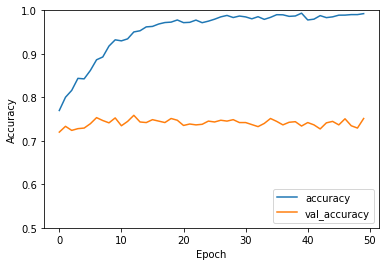

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [25]:
model.save('model2.h5')
from google.colab import files
files.download("model2.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>